In [48]:
''' The ride sharing bonanza continues! Seeing the success of notable players like Uber and Lyft, you've decided to join a fledgling ride sharing company of your own. In your latest capacity, you'll be acting as Chief Data Strategist for the company. In this role, you'll be expected to offer data-backed guidance on new opportunities for market differentiation.

You've since been given access to the company's complete recordset of rides. This contains information about every active driver and historic ride, including details like city, driver count, individual fares, and city type.

Your objective is to build a Bubble Plot that showcases the relationship between four key variables:


Average Fare ($) Per City
Total Number of Rides Per City
Total Number of Drivers Per City
City Type (Urban, Suburban, Rural)


In addition, you will be expected to produce the following three pie charts:


% of Total Fares by City Type
% of Total Rides by City Type
% of Total Drivers by City Type


As final considerations:


You must use the Pandas Library and the Jupyter Notebook.
You must use the Matplotlib and Seaborn libraries.
You must include a written description of three observable trends based on the data.
You must use proper labeling of your plots, including aspects like: Plot Titles, Axes Labels, Legend Labels, Wedge Percentages, and Wedge Labels.
Remember when making your plots to consider aesthetics!


You must stick to the Pyber color scheme (Gold, Light Sky Blue, and Light Coral) in producing your plot and pie charts.
When making your Bubble Plot, experiment with effects like alpha, edgecolor, and linewidths.
When making your Pie Chart, experiment with effects like shadow, startangle, and explosion.


You must include an exported markdown version of your Notebook called  README.md in your GitHub repository.
See Example Solution for a reference on expected format.'''

" The ride sharing bonanza continues! Seeing the success of notable players like Uber and Lyft, you've decided to join a fledgling ride sharing company of your own. In your latest capacity, you'll be acting as Chief Data Strategist for the company. In this role, you'll be expected to offer data-backed guidance on new opportunities for market differentiation.\n\nYou've since been given access to the company's complete recordset of rides. This contains information about every active driver and historic ride, including details like city, driver count, individual fares, and city type.\n\nYour objective is to build a Bubble Plot that showcases the relationship between four key variables:\n\n\nAverage Fare ($) Per City\nTotal Number of Rides Per City\nTotal Number of Drivers Per City\nCity Type (Urban, Suburban, Rural)\n\n\nIn addition, you will be expected to produce the following three pie charts:\n\n\n% of Total Fares by City Type\n% of Total Rides by City Type\n% of Total Drivers by City

# Analysis

Observed Trend 1
Observed Trend 2
Observed Trend 3

In [59]:
#import dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp

#file path
city_file = 'raw_data/city_data.csv'
ride_file = 'raw_data/ride_data.csv'

#read csv into dataframe
city_df = pd.read_csv(city_file)
ride_df = pd.read_csv(ride_file)

#group by city to calculate city level data
ride_by_city = ride_df.groupby(ride_df['city'])

#to merge avg_fare_city with city_df we needed to reset 
#the index to have a column named city to merge on
avg_fare_city = ride_by_city.mean().reset_index()
rides_count = ride_by_city.count().reset_index()


#merge grouped city data with city df
super_city = pd.merge(city_df, avg_fare_city, on = 'city', how = 'outer')
#renaming before second merge
clean_super_city = super_city.rename(columns={"fare": "avg_fare"})

clean_super_city = clean_super_city[['city', 'avg_fare', 'driver_count','type']]

#merge with count of unique ride ids
super_city2 = pd.merge(clean_super_city, rides_count,on = 'city', how = 'outer')

super_city2 = super_city2.rename(columns={"ride_id": "ride_count"})

clean_super_city2 = super_city2[['city', 'avg_fare', 'driver_count','type','ride_count']]
clean_super_city2

,city,avg_fare,driver_count,type,ride_count
0,Kelseyland,21.806429,63,Urban,28
1,Nguyenbury,25.899615,8,Urban,26
2,East Douglas,26.169091,12,Urban,22
3,West Dawnfurt,22.330345,34,Urban,29
4,Rodriguezburgh,21.332609,52,Urban,23
5,South Josephville,26.823750,4,Urban,24
6,West Sydneyhaven,22.368333,70,Urban,18
7,Travisville,27.220870,37,Urban,23
8,Torresshire,24.207308,70,Urban,26
9,Lisaville,28.428929,66,Urban,28


# Bubble Plot of Ride Sharing Data

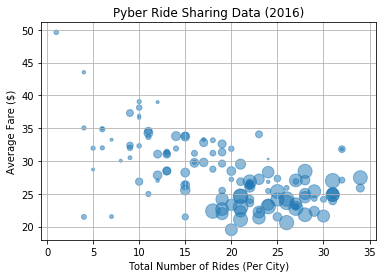

In [62]:
super_city = clean_super_city2

x = super_city['ride_count']
y = super_city['avg_fare']
z = super_city['driver_count']

# use the scatter function
plt.scatter(x, y, s=z*3, alpha=0.5)

# col = np.where(super_city[''<1,'k',np.where(y<5,'b','r'))

plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")

plt.grid(True)
plt.show()